## Тема “Обучение без учителя”
#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib. 

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Создайте датафреймы X и y из этих данных.

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = boston.feature_names)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [7]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

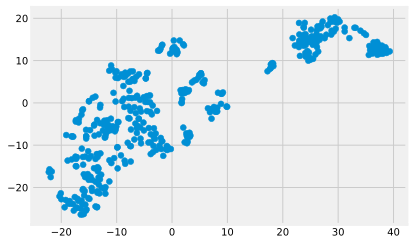

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [11]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

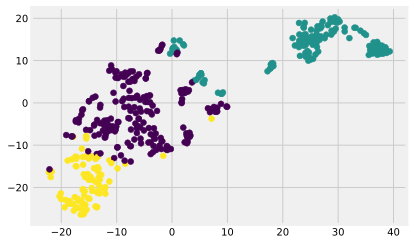

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

Вычислите средние значения price и CRIM в разных кластерах.

In [13]:
# Средняя цена в кластере 0
y_train[labels_train == 0].mean()

price    24.958115
dtype: float64

In [14]:
# Средняя цена в кластере 1
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [15]:
# Средняя цена в кластере 2
y_train[labels_train == 2].mean()

price    27.788372
dtype: float64

Text(0.5, 0, 'Цена')

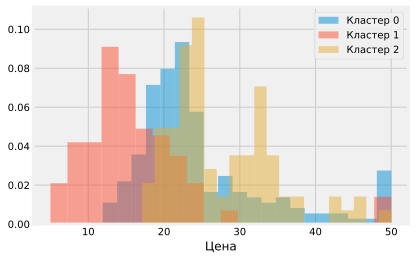

In [16]:
plt.hist(y_train[labels_train == 0], bins = 20, density = True, alpha = 0.5)
plt.hist(y_train[labels_train == 1], bins = 20, density = True, alpha = 0.5)
plt.hist(y_train[labels_train == 2], bins = 20, density = True, alpha = 0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

In [17]:
# Средняя криминальность в кластере 0
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.42166020942408367

In [18]:
# Средняя криминальность в кластере 1
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196853

In [19]:
# Средняя криминальность в кластере 2
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.07356558139534886

#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [20]:
labels_test = kmeans.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [21]:
# Средняя цена в кластере 0
y_test[labels_test == 0].mean()

price    21.860784
dtype: float64

In [22]:
# Средняя цена в кластере 1
y_test[labels_test == 1].mean()

price    16.437143
dtype: float64

In [23]:
# Средняя цена в кластере 2
y_test[labels_test == 2].mean()

price    31.35
dtype: float64

Text(0.5, 0, 'Цена')

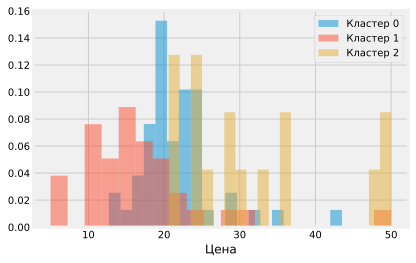

In [24]:
plt.hist(y_test[labels_test == 0], bins = 20, density = True, alpha = 0.5)
plt.hist(y_test[labels_test == 1], bins = 20, density = True, alpha = 0.5)
plt.hist(y_test[labels_test == 2], bins = 20, density = True, alpha = 0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

In [25]:
# Средняя криминальность в кластере 0
X_test.loc[labels_test == 0, 'CRIM'].mean()

0.26607882352941176

In [26]:
# Средняя криминальность в кластере 1
X_test.loc[labels_test == 1, 'CRIM'].mean()

10.165531142857143

In [27]:
# Средняя криминальность в кластере 2
X_test.loc[labels_test == 2, 'CRIM'].mean()

0.062060000000000004